In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.stats import norm


def gauss(x, mu, sigma):
    return norm.pdf(x, mu, sigma)  
    
    
def gauss(x, mu, sigma):
    return ((math.e**(-1/2*(x-mu/sigma)**2))/sigma*np.sqrt(2*math.pi))
    
    
    
# Find the index of the Ly parameter
def Ly_index(ydata):
    maxpos = ydata.index(max(ydata))
    return maxpos


# Find the Ly parameter
def Ly_value(ydata):
    return max(ydata)

    
# Find the alpha_i between 3 vectors
def angle_alpha_i(x1,x2,x3,y1,y2,y3):
    v1 = np.array([0, 1])
    v2 = np.array([x3-x2, y3-y2])
    xx1, yy1 = v1
    xx2, yy2 = v2
    
    inner_product = xx1*xx2 + yy1*yy2
    len1 = math.hypot(xx1, yy1)
    len2 = math.hypot(xx2, yy2)
    theta = math.acos(inner_product/(len1*len2))
    
    if (xx2<0) :
        theta*=-1
    return theta



# Find the winding angle for all datapoints
def winding_angle(xdata, ydata):
    n = len(xdata)
    angles = np.zeros(n-1)
    angles[0] = 0
    if (xdata[1]-xdata[0])!=0:
        angles[0] = math.pi/2 - math.atan((ydata[1]-ydata[0])/(np.abs(xdata[1]-xdata[0])))
        if (xdata[1]<0):
            angles[0] *= -1
        
    for ii in range (1, n-1):
        alpha_i = angle_alpha_i(xdata[ii-1], xdata[ii], xdata[ii+1],
                               ydata[ii-1], ydata[ii], ydata[ii+1])
        #angles[ii] = angles[ii-1] + alpha_i
        angles[ii] = alpha_i
    
    return angles
    


# Find the average of the squares of a vector
# <theta**2> 
def average_squares(vector):
    n = len(vector)
    suma = 0
    for ii in range (n):
        suma += (vector[ii]**2)
    return suma/(n)


# Trick to not simulate over and over
# Sebas dice que no sirve xd
def portion(cte, xdata, ydata):
    n = len(xdata)
    xdata = xdata[0: int(cte*n): 1]
    ydata = ydata[0: int(cte*n): 1]
    return xdata, ydata


#portion = 50000
#portion = 30


# Plot a given curve
def plot_curve(dataframe):
    plt.plot(dataframe["z_real"].to_numpy()[::], dataframe["z_imag"].to_numpy()[::])
    plt.show()

    
def plot_gaussian(dataframe):
    angles = winding_angle(dataframe["z_real"].to_numpy()[::], dataframe["z_imag"].to_numpy()[::])
    bins = np.linspace(min(angles), max(angles), 30)
    hist = np.histogram(angles, bins, density=True)

    popt, pcov = curve_fit(gauss, hist[1][0:len(hist[1])-1], hist[0])
    
    thetas = np.linspace(min(angles), max(angles), 100)
    plt.hist(angles, density=True, bins=30, edgecolor='black', color='purple')
    plt.plot(thetas, gauss(thetas, *popt), '--')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(\theta)$')
    plt.title(r'Distribución de probabilidad, $\kappa = 1$')
    plt.show()


THETA2 = []
LY2 = []


def find_data(dataframe):
    angles = winding_angle(dataframe["z_real"].to_numpy()[::], dataframe["z_imag"].to_numpy()[::])
    THETA2.append(np.var(angles)) 
    LY2.append(Ly_value(dataframe["z_imag"].to_numpy()))
    return angles


def portion_dataframe(dataframe, r):
    z_real = dataframe["z_real"].to_numpy()
    z_img  = dataframe["z_imag"].to_numpy()
    n = len(z_real)
    max_index = int(n*r)
    aux1 = z_real[:max_index:]
    aux2 = z_img[:max_index:]
    #new_data = np.array(aux1, aux2) 
    #print (new_data)
    df = pd.DataFrame({"z_real":aux1, "z_imag":aux2})

    return df

In [2]:
"""
#portion_dataframe(T10, 0.1)

portion = []
#angles = np.array(10)
for ii in range (1, 10): 
    portion.append(portion_dataframe(T10, ii/10))
    #plot_curve(portion[ii/10])
    aux = find_data(portion[ii-1])
"""

'\n#portion_dataframe(T10, 0.1)\n\nportion = []\n#angles = np.array(10)\nfor ii in range (1, 10): \n    portion.append(portion_dataframe(T10, ii/10))\n    #plot_curve(portion[ii/10])\n    aux = find_data(portion[ii-1])\n'

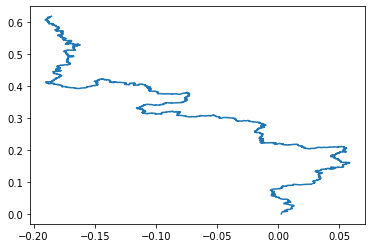

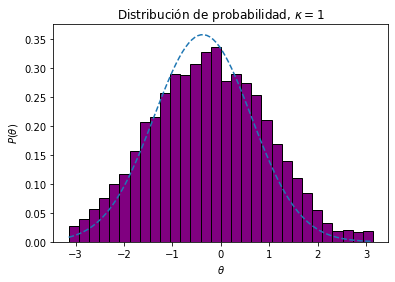

In [3]:
T01 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.1.csv")
T01
plot_curve(T01)
angles01 = find_data(T01)
plot_gaussian(T01)

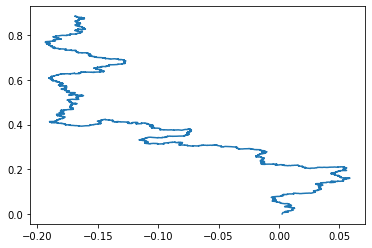

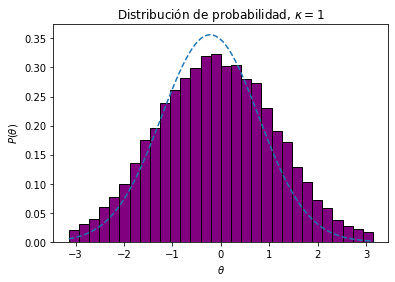

array([ 0.10860326,  1.17010144, -0.87395472, ...,  1.28787485,
       -0.01297261, -1.86323234])

In [4]:
T02 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.2.csv")
T02
plot_curve(T02)
plot_gaussian(T02)
find_data(T02)

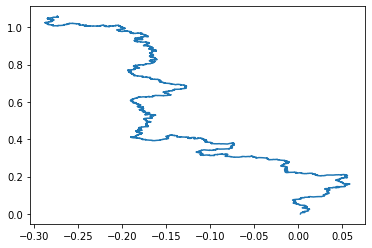

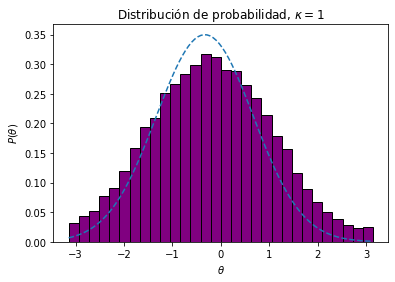

array([ 0.10860326,  1.17010144, -0.87395472, ...,  0.62375942,
        1.3264415 ,  0.6178234 ])

In [5]:
T03 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.3.csv")
T03
plot_curve(T03)
plot_gaussian(T03)
find_data(T03)

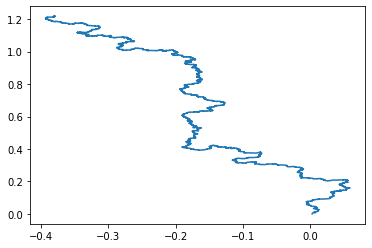

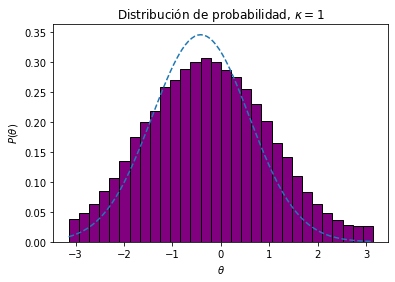

array([ 0.10860326,  1.17010144, -0.87395472, ...,  1.71599069,
        0.79464014,  2.10034064])

In [6]:
T04 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.4.csv")
T04
plot_curve(T04)
plot_gaussian(T04)
find_data(T04)

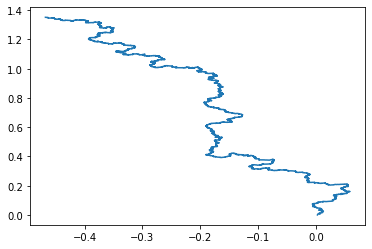

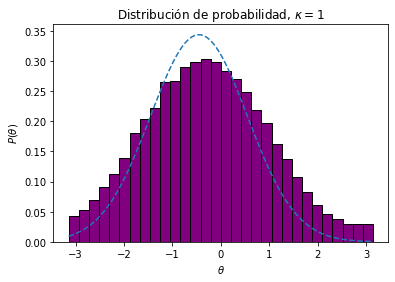

array([ 0.10860326,  1.17010144, -0.87395472, ..., -2.11165962,
       -1.30020698, -2.12243268])

In [7]:
T05 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.5.csv")
T05
plot_curve(T05)
plot_gaussian(T05)
find_data(T05)

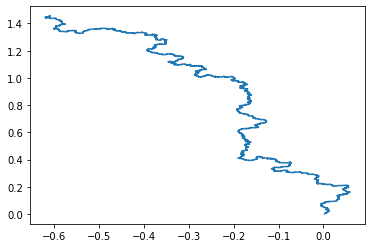

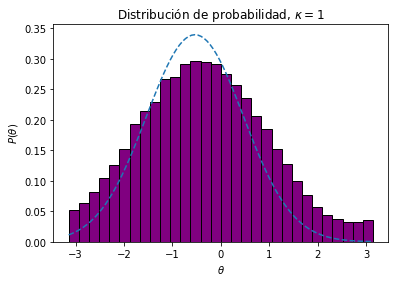

array([ 0.10860326,  1.17010144, -0.87395472, ...,  0.98591412,
        0.31832081,  1.00000072])

In [8]:
T06 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.6.csv")
T06
plot_curve(T06)
plot_gaussian(T06)
find_data(T06)

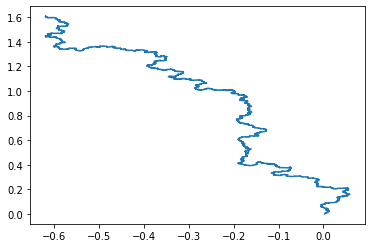

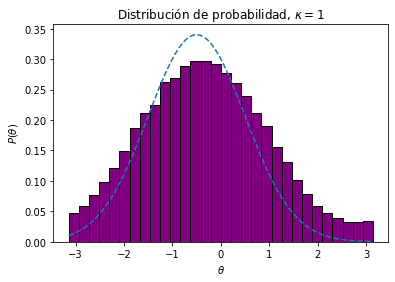

array([ 0.10860326,  1.17010144, -0.87395472, ..., -0.53739206,
        1.56621376, -0.69559678])

In [9]:
T07 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.7.csv")
T07
plot_curve(T07)
plot_gaussian(T07)
find_data(T07)

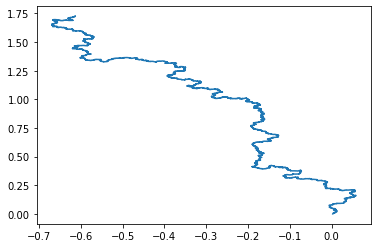

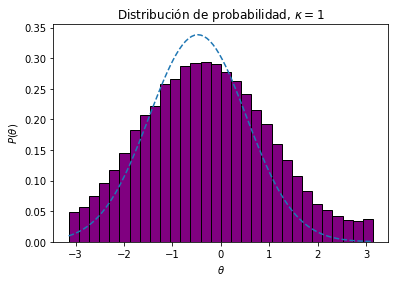

array([ 0.10860326,  1.17010144, -0.87395472, ..., -0.32481296,
       -0.80385435, -0.02758216])

In [10]:
T08 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.8.csv")
T08
plot_curve(T08)
plot_gaussian(T08)
find_data(T08)

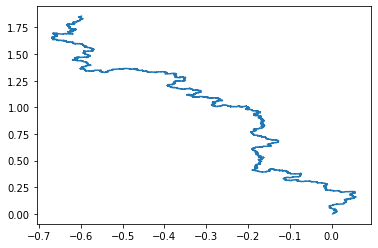

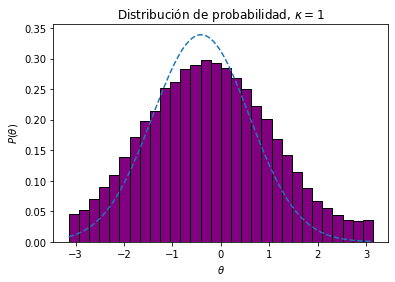

array([ 0.10860326,  1.17010144, -0.87395472, ...,  2.3518501 ,
        0.4648578 ,  1.66034292])

In [11]:
T09 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 0.9.csv")
T09
plot_curve(T09)
plot_gaussian(T09)
find_data(T09)

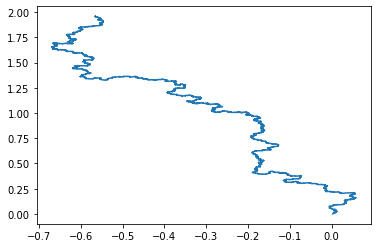

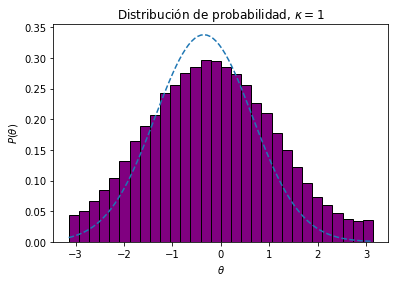

array([ 0.10860326,  1.17010144, -0.87395472, ..., -0.11394749,
       -0.0927224 ,  0.93892725])

In [12]:
T10 = pd.read_csv("Data_WA/NewData/final_curve_values_t= 1.0.csv")
T10
plot_curve(T10)
plot_gaussian(T10)
find_data(T10)

[0.6189873535403936, 0.8845082672812491, 1.0591718264505, 1.2180502707336094, 1.3520609639087644, 1.4530859183152778, 1.6080519729274176, 1.7249937754932034, 1.854294450265404, 1.9601645346829024]
[1.3957876532926838, 1.4178773253142045, 1.511752246695736, 1.5628581734791052, 1.5990294675389176, 1.6713319298525346, 1.6558493058290038, 1.6812989138510661, 1.6652098774845383, 1.6716374580644768]
0.9176973067626414


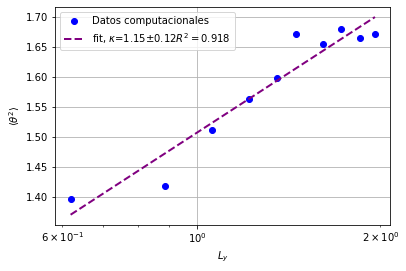

In [22]:
print (LY2)
print (THETA2)

def theta_Ly (x, a, k):
    return a + (k*np.log(x))/4



popt1, pcov1 = curve_fit(theta_Ly, LY2, THETA2)

delta_k = np.sqrt(pcov1[1, 1])
residuals = THETA2- theta_Ly(LY2, *popt1)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((THETA2-np.mean(THETA2))**2)
r_squared = 1 - (ss_res / ss_tot)

print(r_squared)


plt.plot(LY2, THETA2, 'o',label="Datos computacionales", color="blue", markersize=6)
plt.plot(LY2, theta_Ly(LY2, *popt1), "--", label=r"fit, $\kappa$" + f"={popt1[1]:.2f}" \
         + r"$\pm$" + f"{delta_k:.2f}" + r"$R^2 = $" + f"{r_squared:.3f}", linewidth=2, color="purple")
plt.xlabel(r'$L_y$')
plt.ylabel(r'$\langle \theta^2 \rangle$')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [ ]:
delta = 0.01
XX = [0, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta, 5]
YY = [0, 0+delta, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta]

In [ ]:
XX = [0, 2, 3]
YY = [0, 1, 3]

In [ ]:
XX = [0, 0+delta, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta]
YY = [0, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta, 5]


In [ ]:
prueba_angles = winding_angle(XX, YY)
prueba_average_theta2 = average_squares(prueba_angles)
prueba_Ly = Ly_value(YY)
print (prueba_Ly, prueba_average_theta2)
print (prueba_angles)
plt.plot(XX, YY)
plt.grid()
plt.show()

plt.hist(prueba_angles)
plt.show()